/var/folders/79/1x8kzgkn6tl25mx2vqyttj8r0000gn/T/ipykernel_89299/731964786.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  citys = pd.read_csv('city_temperature.csv')


'citys'

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


'citys'

Кількість пропущених значень перед обробкою:
Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64


'selected_cities'

,Region,Country,State,City,Month,Day,Year,AvgTemperature
766687,Europe,Hungary,NaN,Budapest,1,1,1995,34.9
766688,Europe,Hungary,NaN,Budapest,1,2,1995,34.9
766689,Europe,Hungary,NaN,Budapest,1,3,1995,29.0
766690,Europe,Hungary,NaN,Budapest,1,4,1995,28.0
766691,Europe,Hungary,NaN,Budapest,1,5,1995,31.0
...,...,...,...,...,...,...,...,...
996096,Europe,United Kingdom,NaN,London,5,9,2020,64.1
996097,Europe,United Kingdom,NaN,London,5,10,2020,54.1
996098,Europe,United Kingdom,NaN,London,5,11,2020,47.0
996099,Europe,United Kingdom,NaN,London,5,12,2020,48.9


'selected_cities'

[['Budapest', 51.09906108353119], ['Kiev', 47.66315562270667], ['London', 52.36522771422405]]
Місяць з найвищою середньою температурою:
        City  Month  AvgTemperature
6   Budapest      7       71.122968
18      Kiev      7       70.434581
30    London      7       65.686968
Місяць з найнижчою середньою температурою:
        City  Month  AvgTemperature
0   Budapest      1       30.301861
12      Kiev      1       24.999132
24    London      1       41.681266
Середня зміна температури протягом 12 місяців        City  TemperatureDifference
0  Budapest               0.134273
1      Kiev               0.240437
2    London               0.011954


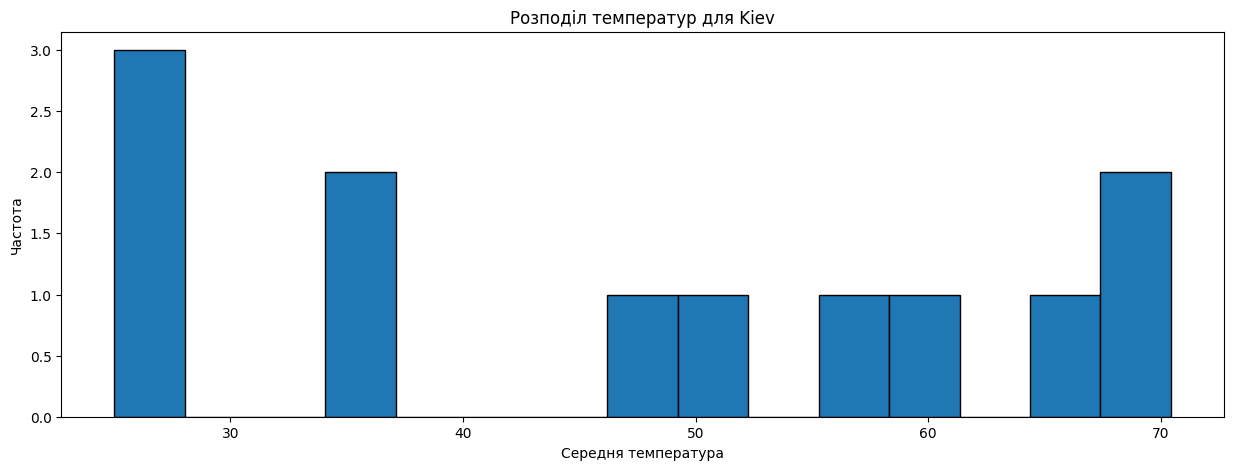

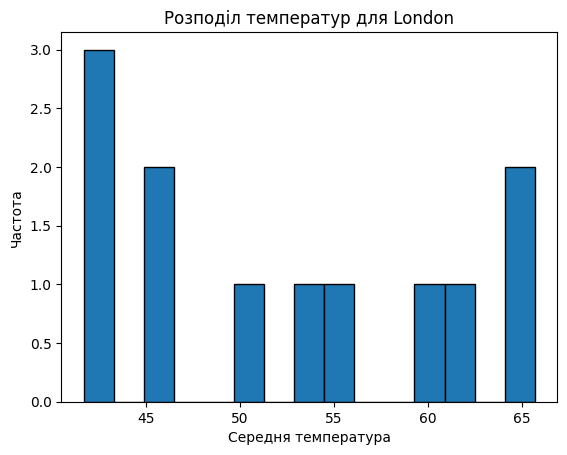

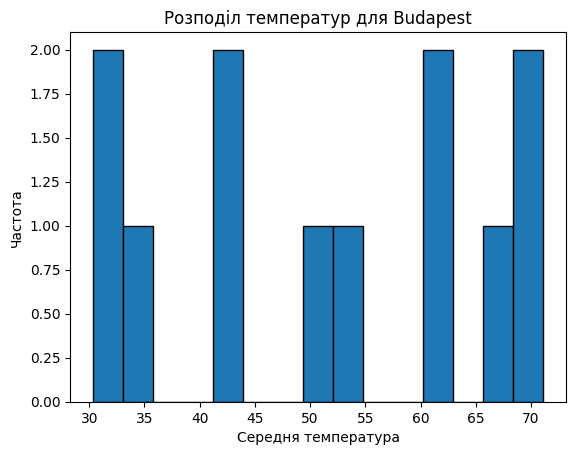

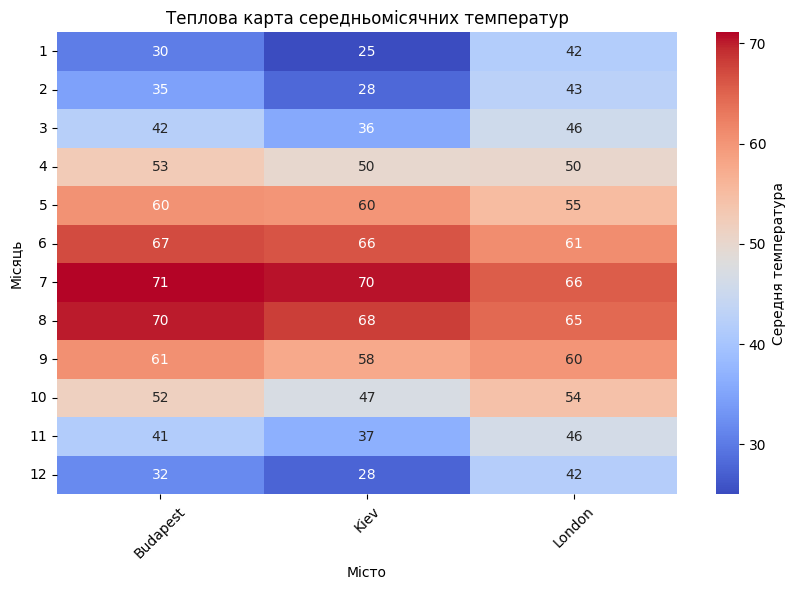

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

citys = pd.read_csv('city_temperature.csv')
display("citys", citys, "citys") # виводження таблиці

print("Кількість пропущених значень перед обробкою:")
print(citys.isnull().sum()) # кількість пропущених значень

#citys.fillna(citys.mean(), inplace=True) # заміна усіх пропущених числових значень, на серенє число

selected_cities = citys[citys['City'].isin(['Kiev', 'London', 'Budapest'])] # обираємо декілька міст
display("selected_cities", selected_cities, "selected_cities")

average_temperature_per_city = selected_cities.groupby('City')['AvgTemperature'].mean().reset_index() # групування за містами, обрання колонки з якою ми працюватимемо, пошук середнього значення, та прибираємо індекси

average_array = average_temperature_per_city.values.tolist() # перетворення результатів у масив
print(average_array)

average_temperature_per_month_city = selected_cities.groupby(['City','Month'])['AvgTemperature'].mean().reset_index() # групування даних за містом і місяцем, обчислення середньої температури для кожної групи
highest_temperature_month_city = average_temperature_per_month_city.loc[average_temperature_per_month_city.groupby('City')['AvgTemperature'].idxmax()] # знаходження місяця з найвищою середньою температурою для кожного міста
lowest_temperature_month_city = average_temperature_per_month_city.loc[average_temperature_per_month_city.groupby('City')['AvgTemperature'].idxmin()]# знаходження місяця з найнижчою середньою температурою для кожного міста

print("Місяць з найвищою середньою температурою:")
print(highest_temperature_month_city)
print("Місяць з найнижчою середньою температурою:")
print(lowest_temperature_month_city)



max_temperature_per_month_city = average_temperature_per_month_city.loc[average_temperature_per_month_city.groupby(['City', 'Month'])['AvgTemperature'].idxmax()] # знаходження найвищої середньої температури для кожного міста в кожному місяці
max_temperature_per_month_city['TemperatureDifference'] = max_temperature_per_month_city.groupby('City')['AvgTemperature'].diff() # знаходження різниці між температурами для кожного міста
average_temperature_difference = max_temperature_per_month_city.groupby('City')['TemperatureDifference'].mean().reset_index() #середня різниця 
print("Середня зміна температури протягом 12 місяців",average_temperature_difference)


plt.figure(figsize=(15, 5)) # задаємо ширину та висоту нашого вікна

for city in ['Kiev', 'London', 'Budapest']:
    city_data = average_temperature_per_month_city[average_temperature_per_month_city['City'] == city] # шукаємо тільки ті міста з якими ми зараз працюємо
#    print(city_data)
    plt.hist(city_data['AvgTemperature'], bins=15, edgecolor='black', alpha=1) # створюємо таблицю, де задаємо характеристику що ми працюємо тільки з евердж темп, і також параметри
    plt.title(f'Розподіл температур для {city}')
    plt.xlabel('Середня температура')
    plt.ylabel('Частота')
    plt.show()

heatmap_data = average_temperature_per_month_city.pivot(index='Month', columns='City', values='AvgTemperature') # перетворення даних з одного формату в інший, щоб можна було легко побудувати теплову карту

# Побудова теплової карти
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar_kws={'label': 'Середня температура'})
plt.title('Теплова карта середньомісячних температур')
plt.xlabel('Місто')
plt.ylabel('Місяць')
plt.xticks(rotation=45)  
plt.yticks(rotation=0)   
plt.show()